# In This Notebook we are preprocessing the Data and Building Model

In [1]:
import pandas as pd
import numpy as nan
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('train_indessa.csv')

In [3]:




def preprocess(x):
    x = str(x).lower()
    x = x.replace("NA", " ").replace("th week", " ").replace("n/a", "0")\
                           .replace("\+ years", " ").replace("years", "0").replace("< 1 year", "0")\
                           .replace("year", "0").replace("A", "0").replace("B", "1")\
                           .replace("C", "2").replace("D", "3").replace("E", "4")\
                           .replace("F", "5")
    x = re.sub(r"[^a-zA-Z]"," ",x)
    
    
    
   
   

In [4]:
df.fillna(0)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,0,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,0,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,0,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,0.0,0.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,0,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,0.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,0,credit_card,refi,900xx,CA,20.16,0.0,0.0,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,10+ years,MORTGAGE,75000.0,Source Verified,n,0,debt_consolidation,Debt consolidation,481xx,MI,14.53,0.0,0.0,0.0,51.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,10+ years,MORTGAGE,59000.0,Not Verified,n,0,debt_consolidation,Debt consolidation,496xx,MI,22.97,0.0,0.0,0.0,81.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,0,20.80,E,E1,Comcast cable,8 years,RENT,42504.0,Verified,n,0,debt_consolidation,Debt consolidation,370xx,TN,27.27,0.0,1.0,26.0,0.0,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,1 year,RENT,50000.0,Source Verified,n,0,credit_card,Credit card refinancing,432xx,OH,14.91,0.0,1.0,0.0,0.0,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,0.0,INDIVIDUAL,0,78th week,0.0,0.0,29197.0,23300.0,0


In [5]:
cols_with_missing=[col for col in df.columns if df[col].isnull().sum()>1]

In [6]:
cols_with_missing

['batch_enrolled',
 'emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [7]:
df=df.apply(lambda x:x.replace("NaN",'0'))

In [8]:
cols_with_missing=[col for col in df.columns if df[col].isnull().sum()>1]
cols_with_missing

['batch_enrolled',
 'emp_title',
 'emp_length',
 'annual_inc',
 'desc',
 'title',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [9]:
df['last_week_pay']=df['last_week_pay'].apply(lambda x:x.replace('th week'," ").replace("NA", " ").replace("th week", " ").replace("n/a", "0").replace("\+ years", " ").replace("years", "0").replace("< 1 year", "0").replace("year", "0").replace("A", "0").replace("B", "1").replace("C", "2").replace("D", "3").replace("E", "4").replace("F", "5"))

In [10]:
df['sub_grade']=df['sub_grade'].apply(lambda x:x.replace('th week'," ").replace("NA", " ").replace("th week", " ").replace("n/a", "0").replace("\+ years", " ").replace("years", "0").replace("< 1 year", "0").replace("year", "0").replace("A", "0").replace("B", "1").replace("C", "2").replace("D", "3").replace("E", "4").replace("F", "5"))

In [11]:

df['term']=df['term'].apply(lambda x:x.replace('th week'," ").replace("NA", " ").replace("th week", " ").replace("n/a", "0").replace("\+ years", " ").replace("years", "0").replace("< 1 year", "0").replace("year", "0").replace("A", "0").replace("B", "1").replace("C", "2").replace("D", "3").replace("E", "4").replace("F", "5").replace("months", " "))


In [12]:
df['term']

0         36  
1         36  
2         36  
3         36  
4         36  
          ... 
532423    36  
532424    60  
532425    60  
532426    60  
532427    36  
Name: term, Length: 532428, dtype: object

In [13]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,43,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,04,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96,0.0,0.0,47159.0,47033.0,0


In [14]:
df.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [15]:
df['home_ownership']=df['home_ownership'].apply(lambda x:x.replace('OWN',"0").replace("MORTGAGE", "1").replace("RENT", "2").replace("OTHER", "3").replace("NONE", "4").replace("ANY", "5"))

In [16]:
df['home_ownership']

0         0
1         1
2         0
3         2
4         2
         ..
532423    1
532424    1
532425    2
532426    2
532427    2
Name: home_ownership, Length: 532428, dtype: object

In [17]:
df.addr_state.unique()
del df['addr_state']

In [18]:
for col in df.columns:
    print(df[col].unique())

[58189336 70011223 70255675 ...  7357607 23182668 46122259]
[14350  4800 10000 ... 34600   725   925]
[14350  4800 10000 ... 34600   725   925]
[14350.          4800.         10000.         ...  4687.79228349
 17901.7719906   8283.54      ]
['36  ' '60  ']
[' ' 'BAT1586599' 'BAT4808022' 'BAT2833642' 'BAT2575549' nan 'BAT4136152'
 'BAT4694572' 'BAT5924421' 'BAT3193689' 'BAT224923' 'BAT1184694'
 'BAT1930365' 'BAT3873588' 'BAT2252229' 'BAT1135695' 'BAT4271519'
 'BAT3726927' 'BAT2803411' 'BAT1104812' 'BAT5341619' 'BAT3865626'
 'BAT1780517' 'BAT2522922' 'BAT2558388' 'BAT2428731' 'BAT3943761'
 'BAT2333412' 'BAT5849876' 'BAT5540558' 'BAT2136391' 'BAT1761981'
 'BAT47674' 'BAT1327206' 'BAT1467036' 'BAT2003848' 'BAT4722912'
 'BAT4201183' 'BAT5525466' 'BAT5489674' 'BAT2078974' 'BAT4351734'
 'BAT2677031' 'BAT3461431' 'BAT3292317' 'BAT1766061' 'BAT1914408'
 'BAT1942645' 'BAT5458862' 'BAT2015867' 'BAT1691418' 'BAT5877328'
 'BAT5614983' 'BAT1755192' 'BAT4786748' 'BAT5811547' 'BAT2881062'
 'BAT4051248

[ 0.  1.  2.  3. nan  4. 16.  5.  7. 14.]
[ 74.  nan  54.  52.  82.  72.  26.  18.  47.  50.  22.  66.  17.  44.
  89.  35.  41.  32.  19.  78.  79.   3.  10.  56.  70.   7.  14.  53.
  46.  16.  75.  48.  62.  55.  37.  34.  68.  11.  33.  69.  21.  67.
   9.  23.  30.  15.  59.  49.  12.  28.  64.  51.  58.  13.  31.  65.
  36.  60.  29.  45.  25.  43.  42.  81.  38.   8.  80.  63.  57.  73.
  40.  86.   6.  61.  39.   5.  77. 125. 100.  24.  76.  92. 132.  20.
   4.  71.   1.  90.  85. 116. 111.  27.  94. 108. 118.   2.  84. 135.
  97. 120. 136. 119. 106.   0. 137.  95. 101.  93. 103.  91. 121. 122.
 124.  87. 134. 123. 148. 146. 115. 127.  83. 129. 147.  96.  98. 138.
 149. 107. 102.  88. 112. 105. 128. 142. 109. 133. 141. 150. 113.  99.
 104. 130. 143. 110. 114. 139. 117. 144. 131. 126. 145. 153. 176. 159.
 152. 151. 170. 140. 180. 154. 162. 165. 171.]
['INDIVIDUAL' 'JOINT']
[nan 'Verified' 'Not Verified' 'Source Verified']
['26 ' '9 ' '135 ' '96 ' '113 ' '117 ' '78 ' '44 ' '52 ' 

In [19]:
new_purpose=pd.get_dummies(df['purpose'],drop_first=True)

In [20]:
new_purpose=pd.DataFrame(new_purpose)

In [21]:
df=pd.concat([df,new_purpose],axis=1)

In [22]:
del df['purpose']

In [23]:
df['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [24]:
df['initial_list_status']=df['initial_list_status'].apply(lambda x:x.replace("f","0").replace('w','1'))

In [25]:
df['initial_list_status']

0         0
1         1
2         1
3         0
4         1
         ..
532423    0
532424    1
532425    0
532426    1
532427    0
Name: initial_list_status, Length: 532428, dtype: object

In [26]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [27]:
df['application_type']=df['application_type'].apply(lambda x:x.replace("INDIVIDUAL","0").replace('JOINT','1'))

In [28]:
df['application_type']

0         0
1         0
2         0
3         0
4         0
         ..
532423    0
532424    0
532425    0
532426    0
532427    0
Name: application_type, Length: 532428, dtype: object

In [29]:
df['zip_code']=df['zip_code'].apply(lambda x:x.replace("xx",""))

In [30]:
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [31]:
df['verification_status']=df['verification_status'].apply(lambda x:x.replace("Source Verified","0").replace('Not Verified','1').replace('Verified','2'))

In [32]:
df['emp_length'].dtype

dtype('O')

In [33]:
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

In [34]:
df['emp_length']

0          9
1          0
2          2
3         10
4         10
          ..
532423    10
532424    10
532425     8
532426     1
532427     0
Name: emp_length, Length: 532428, dtype: object

In [35]:
df['grade']=df['grade'].apply(lambda x:x.replace('th week'," ").replace("NA", " ").replace("th week", " ").replace("n/a", "0").replace("\+ years", " ").replace("years", "0").replace("< 1 year", "0").replace("year", "0").replace("A", "0").replace("B", "1").replace("C", "2").replace("D", "3").replace("E", "4").replace("F", "5"))

In [36]:
df['grade']

0         4
1         1
2         0
3         3
4         1
         ..
532423    1
532424    2
532425    4
532426    3
532427    0
Name: grade, Length: 532428, dtype: object

In [37]:
df.head(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,title,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,58189336,14350,14350,14350.0,36,,19.19,4,43,clerk,9,0,28700.0,0,n,NaN,Debt consolidation,349,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,74.0,0,NaN,26,0.0,0.0,28699.0,30800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,1,14,Human Resources Specialist,0,1,65000.0,0,n,NaN,Home improvement,209,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,NaN,0,NaN,9,0.0,0.0,9974.0,32900.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
categorical_cols=[cname for cname in df.columns if df[cname].dtype == "O"]

In [39]:
df=df.drop([])

In [40]:
del df['title']

In [41]:
df.head(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,58189336,14350,14350,14350.0,36,,19.19,4,43,clerk,9,0,28700.0,0,n,NaN,349,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,74.0,0,NaN,26,0.0,0.0,28699.0,30800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,1,14,Human Resources Specialist,0,1,65000.0,0,n,NaN,209,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,NaN,0,NaN,9,0.0,0.0,9974.0,32900.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [42]:
del df['emp_title']

In [43]:
del df['batch_enrolled']

In [44]:
df.shape

(532428, 53)

In [45]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,58189336,14350,14350,14350.0,36,19.19,4,43,9,0,28700.0,0,n,NaN,349,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,0,1173.84,0.0,0.0,0.0,0.0,74.0,0,NaN,26,0.0,0.0,28699.0,30800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,70011223,4800,4800,4800.0,36,10.99,1,14,0,1,65000.0,0,n,NaN,209,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,1,83.95,0.0,0.0,0.0,0.0,NaN,0,NaN,9,0.0,0.0,9974.0,32900.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,70255675,10000,10000,10000.0,36,7.26,0,04,2,0,45000.0,1,n,NaN,447,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,1,56.47,0.0,0.0,0.0,0.0,NaN,0,NaN,9,0.0,65.0,38295.0,34900.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1893936,15000,15000,15000.0,36,19.72,3,35,10,2,105000.0,1,n,> My goal is to obtain a loan to pay off my hi...,221,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,0,4858.62,0.0,0.0,0.0,0.0,NaN,0,NaN,135,0.0,0.0,55564.0,24700.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,7652106,16000,16000,16000.0,36,10.64,1,12,10,2,52000.0,2,n,NaN,900,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,1,2296.41,0.0,0.0,0.0,0.0,NaN,0,NaN,96,0.0,0.0,47159.0,47033.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
df.shape

(532428, 53)

In [47]:
del df['verification_status_joint']

In [48]:
del df['desc']

In [49]:
df['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [50]:
df['pymnt_plan']=df['pymnt_plan'].apply(lambda x:x.replace('n',"1").replace("y", "1"))

In [51]:
# # Note
# in this preprocessing step we deleted all the colums where the cardinality is so high if we converted all the variable in features
# # it will eat up lot of space (' i have basic computer it was taking 4-5 minutes to load the data so i avoided it ')

# Convert categorical columns to Numerical

In [52]:
categorical_cols=[cname for cname in df.columns if df[cname].dtype == "O"]

In [53]:

categorical_cols

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'zip_code',
 'initial_list_status',
 'application_type',
 'last_week_pay']

In [54]:
for col in categorical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [55]:
categorical_cols=[cname for cname in df.columns if df[cname].dtype == "O"]
categorical_cols

[]

# Now we do not have any categorical column

In [56]:
numerical_cols=[cname for cname in df.columns if df[cname].dtype !="O"]

In [57]:
len(numerical_cols)

51

In [58]:
df.shape

(532428, 51)

# Missing value inputation with mean/median

In [59]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df)

SimpleImputer()

In [60]:
df.isna().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
grade                            3221
sub_grade                        3221
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
zip_code                            0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec                            16
revol_bal                           0
revol_util                        287
total_acc                          16
initial_list_status                 0
total_rec_int                       0
total_rec_la

In [61]:
miss_calls=['delinq_2yrs','annual_inc','inq_last_6mths','grade','sub_grade','emp_length','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_util','total_acc','collections_12_mths_ex_med','mths_since_last_major_derog','last_week_pay','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']

In [62]:
for col in miss_calls:
    df[col].fillna(df[col].median(), inplace=True)

In [63]:
df.isna().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
zip_code                       0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
collections_12_mths_ex_med     0
mths_since

In [64]:
X=df.drop(['loan_status'],axis=1)
y=df['loan_status']

# Train Test split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30) 

# Apply MinMaxScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.fit(X_test)

MinMaxScaler()

# <font color=red>Logistic Regression</font>

In [67]:
from sklearn import linear_model
classifier=linear_model.LogisticRegression()
classifier.fit(X_train, y_train)

# evaluate predictions
y_train_pred = classifier.predict(X_train)

print('Training Accuracy',  metrics.accuracy_score(y_train, y_train_pred))

# make predictions for test data
y_pred_cat = classifier.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


AUC_ROC_SCORE = roc_auc_score(y_test, predictions)
print("Area under the curve: %.10f%%" % (AUC_ROC_SCORE * 100))

print('Test Score : %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print( "precision------------>",metrics.precision_score(y_test, predictions))
print( "Recall------------>", metrics.recall_score(y_test, predictions))
print( "F1-score------------>",metrics.f1_score(y_test, predictions))

Training Accuracy 0.8243354556894438
Area under the curve: 68.0450236132%
Test Score : 0.823
[[115897   5919]
 [ 22388  15525]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89    121816
           1       0.72      0.41      0.52     37913

    accuracy                           0.82    159729
   macro avg       0.78      0.68      0.71    159729
weighted avg       0.81      0.82      0.80    159729

precision------------> 0.7239787353105764
Recall------------> 0.40949014849787674
F1-score------------> 0.5231059521202217


In [ ]:

# from sklearn.svm import SVC
# classifier=SVC()
# classifier.fit(X_train, y_train)

# # evaluate predictions
# y_train_pred = classifier.predict(X_train)

# print('Training Accuracy',  metrics.accuracy_score(y_train, y_train_pred))

# # make predictions for test data
# y_pred_cat = classifier.predict(X_test)
# predictions = [round(value) for value in y_pred_cat]


# AUC_ROC_SCORE = roc_auc_score(y_test, predictions)
# print("Area under the curve: %.10f%%" % (AUC_ROC_SCORE * 100))

# print('Test Score : %.3f' % metrics.accuracy_score(y_test, predictions))

# print(metrics.confusion_matrix(y_test, predictions))

# print(metrics.classification_report(y_test, predictions))

# print( "precision------------>",metrics.precision_score(y_test, predictions))
# print( "Recall------------>", metrics.recall_score(y_test, predictions))
# print( "F1-score------------>",metrics.f1_score(y_test, predictions))

# <font color =red> lets use the Gaussian Naive Bayes algorithm for classification</font>

In [68]:

from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(X_train, y_train)

# evaluate predictions
y_train_pred = classifier.predict(X_train)

print('Training Accuracy',  metrics.accuracy_score(y_train, y_train_pred))

# make predictions for test data
y_pred_cat = classifier.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


AUC_ROC_SCORE = roc_auc_score(y_test, predictions)
print("Area under the curve: %.10f%%" % (AUC_ROC_SCORE * 100))

print('Test Score : %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print( "precision------------>",metrics.precision_score(y_test, predictions))
print( "Recall------------>", metrics.recall_score(y_test, predictions))
print( "F1-score------------>",metrics.f1_score(y_test, predictions))

Training Accuracy 0.7389636140692624
Area under the curve: 73.4856460258%
Test Score : 0.738
[[90149 31667]
 [10249 27664]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81    121816
           1       0.47      0.73      0.57     37913

    accuracy                           0.74    159729
   macro avg       0.68      0.73      0.69    159729
weighted avg       0.80      0.74      0.75    159729

precision------------> 0.4662655272960173
Recall------------> 0.7296705615488092
F1-score------------> 0.5689605528361648


# <font color=red> we want to predict the probability of each class so in below cell we are predicting the probability of each class </font>

In [69]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
X, y = make_classification(n_samples=100, n_features=2,
                            n_redundant=0, random_state=42)
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=3)
calibrated_clf.fit(X, y)

CalibratedClassifierCV(base_estimator=GaussianNB(), cv=3)

# <font color=green> CalibratedClassifierCV </font>

# <font color= orange> used Calibrated Classifier so we get output with probability values </font>

In [70]:
calibrated_clf.predict_proba(X)[:5, :]

array([[0.11009913, 0.88990087],
       [0.07226373, 0.92773627],
       [0.92831861, 0.07168139],
       [0.9283446 , 0.0716554 ],
       [0.07186091, 0.92813909]])

# <font color=red>This above function can be used for all classifier to predict their probabilities Im just using here once  for demonstration</font> 

# <font color=blue>RandomForestClassifier</font>

In [79]:


from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
classifier.fit(X_train, y_train)


y_train_pred = classifier.predict(X_train)


y_pred_cat = classifier.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


AUC_ROC_SCORE = roc_auc_score(y_test, predictions)
print("Area under the curve: %.10f%%" % (AUC_ROC_SCORE * 100))

print('Test Score : %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print( "precision------------>",metrics.precision_score(y_test, predictions))
print( "Recall------------>", metrics.recall_score(y_test, predictions))
print( "F1-score------------>",metrics.f1_score(y_test, predictions))

Training Accuracy 0.999994633739291
Area under the curve: 85.8389256448%
Test Score : 0.919
[[118626   3231]
 [  9722  28150]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    121857
           1       0.90      0.74      0.81     37872

    accuracy                           0.92    159729
   macro avg       0.91      0.86      0.88    159729
weighted avg       0.92      0.92      0.92    159729

precision------------> 0.8970396099550684
Recall------------> 0.7432931981411068
F1-score------------> 0.8129611713571975


# <font color=red>XBGClassifier</font>

In [93]:


from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train, y_train)


y_train_pred = classifier.predict(X_train)

print('Training Accuracy',  metrics.accuracy_score(y_train, y_train_pred))

y_pred_cat = classifier.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


AUC_ROC_SCORE = roc_auc_score(y_test, predictions)
print("Area under the curve: %.10f%%" % (AUC_ROC_SCORE * 100))

print('Test Score : %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print( "precision------------>",metrics.precision_score(y_test, predictions))
print( "Recall------------>", metrics.recall_score(y_test, predictions))
print( "F1-score------------>",metrics.f1_score(y_test, predictions))

[21:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy 0.9451782805964062
Area under the curve: 91.9526356838%
Test Score : 0.940
[[116714   5143]
 [  4497  33375]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    121857
           1       0.87      0.88      0.87     37872

    accuracy                           0.94    159729
   macro avg       0.91      0.92      0.92    159729
weighted avg       0.94      0.94      0.94    159729

precision------------> 0.8664780102809077
Recall------------> 0.8812579214195184
F1-score------------> 0.8738054719204085


# <font color=red>AdaBoost</font>

In [95]:


from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)

print('Training Accuracy',  metrics.accuracy_score(y_train, y_train_pred))


y_pred_cat = classifier.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


AUC_ROC_SCORE = roc_auc_score(y_test, predictions)
print("Area under the curve: %.10f%%" % (AUC_ROC_SCORE * 100))

print('Test Score : %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print( "precision------------>",metrics.precision_score(y_test, predictions))
print( "Recall------------>", metrics.recall_score(y_test, predictions))
print( "F1-score------------>",metrics.f1_score(y_test, predictions))

Training Accuracy 0.8964714152707681
Area under the curve: 80.6424684927%
Test Score : 0.895
[[118848   3009]
 [ 13727  24145]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93    121857
           1       0.89      0.64      0.74     37872

    accuracy                           0.90    159729
   macro avg       0.89      0.81      0.84    159729
weighted avg       0.89      0.90      0.89    159729

precision------------> 0.8891875966708404
Recall------------> 0.6375422475707647
F1-score------------> 0.7426260265124719


# <font color=red>CatboostClassifier</font>

In [82]:

from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(learning_rate=0.1, n_estimators=1500, subsample=0.70, max_depth=8, scale_pos_weight=2.5, silent=True)
cat_clf.fit(X_train, y_train)

y_train_predict_cat = cat_clf.predict(X_train)

print('Train Accuracy: %.3f' % metrics.accuracy_score(y_train, y_train_predict_cat))


y_pred_cat = cat_clf.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


accuracy_per_roc_auc = roc_auc_score(y_test, predictions)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

print('Test Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print( "precision------------>",metrics.precision_score(y_test, predictions))
print( "Recall------------>", metrics.recall_score(y_test, predictions))
print( "F1-score------------>",metrics.f1_score(y_test, predictions))

Train Accuracy: 0.953
ROC-AUC: 93.5688250721%
Test Accuracy: 0.940
[[115067   6749]
 [  2776  35137]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96    121816
           1       0.84      0.93      0.88     37913

    accuracy                           0.94    159729
   macro avg       0.91      0.94      0.92    159729
weighted avg       0.94      0.94      0.94    159729

precision------------> 0.8388721768610037
Recall------------> 0.9267797325455649
F1-score------------> 0.8806376019749621


# <font color=red>DecisionTreeClassifier</font>

In [99]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)


y_train_pred = classifier.predict(X_train)


y_pred_cat = classifier.predict(X_test)
predictions = [round(value) for value in y_pred_cat]


AUC_ROC_SCORE = roc_auc_score(y_test, predictions)
print("Area under the curve: %.10f%%" % (AUC_ROC_SCORE * 100))

print('Test Score : %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print( "precision------------>",metrics.precision_score(y_test, predictions))
print( "Recall------------>", metrics.recall_score(y_test, predictions))
print( "F1-score------------>",metrics.f1_score(y_test, predictions))

Training Accuracy 1.0
Area under the curve: 86.9538961085%
Test Score : 0.905
[[114152   7705]
 [  7487  30385]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    121857
           1       0.80      0.80      0.80     37872

    accuracy                           0.90    159729
   macro avg       0.87      0.87      0.87    159729
weighted avg       0.91      0.90      0.90    159729

precision------------> 0.797715935941192
Recall------------> 0.8023077735530207
F1-score------------> 0.8000052657907902


# <font color=red>NeuralNetwork</font>

In [101]:

print('Building Neural Network model...')
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
np.random.seed(697)
# adam = optimizers.adam(lr = 0.005, decay = 0.0000001)

model = Sequential()
model.add(Dense(48, input_dim=X_train.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(24,
                #kernel_regularizer=regularizers.l2(0.02),
                activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64)

Building Neural Network model...
Epoch 1/15
4659/4659 [==============================] - 6s 1ms/step - loss: 0.5692 - val_loss: 0.5477
Epoch 2/15
4659/4659 [==============================] - 5s 1ms/step - loss: 0.5470 - val_loss: 0.5483
Epoch 3/15
4659/4659 [==============================] - 5s 1ms/step - loss: 0.5466 - val_loss: 0.5483TA: 1s - loss: 0 - ETA: 1s - loss:  - ETA: 0
Epoch 4/15
4659/4659 [==============================] - 5s 1ms/step - loss: 0.5463 - val_loss: 0.5481
Epoch 5/15
4659/4659 [==============================] - 5s 1ms/step - loss: 0.5463 - val_loss: 0.5487 0.54 - ETA: 2s - loss:  - ETA: 1s  - ETA: 1s - lo - ETA: 0s -
Epoch 6/15
4659/4659 [==============================] - 7s 2ms/step - loss: 0.5447 - val_loss: 0.5446
Epoch 7/15
4659/4659 [==============================] - 12s 3ms/step - loss: 0.5442 - val_loss: 0.5368
Epoch 8/15
4659/4659 [==============================] - 8s 2ms/step - loss: 0.5442 - val_loss: 0.5454
Epoch 9/15
4659/4659 [======================

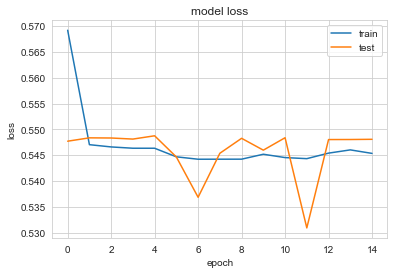

In [102]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [103]:
#Predict on test set
predictions_NN_prob = model.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0)

In [104]:
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Overall accuracy of Neural Network model:', acc_NN)

Overall accuracy of Neural Network model: 0.7628984091805495


In [105]:


print('Test Accuracy: %.3f' % metrics.accuracy_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions))

print(metrics.classification_report(y_test, predictions))

print('Precision Score: %.3f' % metrics.precision_score(y_test, predictions))
print('Recall Score: %.3f' % metrics.recall_score(y_test, predictions))
print('F1 Score: %.3f' % metrics.f1_score(y_test, predictions)) 

Test Accuracy: 0.905
[[114152   7705]
 [  7487  30385]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    121857
           1       0.80      0.80      0.80     37872

    accuracy                           0.90    159729
   macro avg       0.87      0.87      0.87    159729
weighted avg       0.91      0.90      0.90    159729

Precision Score: 0.798
Recall Score: 0.802
F1 Score: 0.800


In [80]:
print("ROC_AUC SCORE FOR LogisticRegression----> 64.4149576482%")
print("*"*40)
print("ROC_AUC SCORE FOR SupportVectorClassifier ---> 71.435324%")
print("*"*40)
print("ROC_AUC SCORE FOR NaiveBayesClassifier ---------> 73.4638984099%")
print("*"*40)
print("ROC_AUC SCORE FOR DecisionTreeClassifier-----> 86.9538961085%")
print("*"*40)
print("ROC_AUC SCORE FOR RandomforestClassifier----> 85.8389256448%")
print("*"*40)
print("ROC_AUC SCORE FOR Adaboostclassifier ------> 80.6424684927%")
print("*"*40)
print("ROC_AUC SCORE FOR Xgboostclassifier ------> 91.9524684927% " , "ie 92 %" )
print("*"*40)
print("ROC_AUC SCORE FOR catboostclassifier ------> 93.567572%")
print("*"*40)
print("ROC_AUC SCORE FOR NeuralNetwork Model  ----> 90.517572%")

ROC_AUC SCORE FOR LogisticRegression----> 64.4149576482%
****************************************
ROC_AUC SCORE FOR SupportVectorClassifier ---> 71.435324%
****************************************
ROC_AUC SCORE FOR NaiveBayesClassifier ---------> 73.4638984099%
****************************************
ROC_AUC SCORE FOR DecisionTreeClassifier-----> 86.9538961085%
****************************************
ROC_AUC SCORE FOR RandomforestClassifier----> 85.8389256448%
****************************************
ROC_AUC SCORE FOR Adaboostclassifier ------> 80.6424684927%
****************************************
ROC_AUC SCORE FOR Xgboostclassifier ------> 91.9524684927%  ie 92 %
****************************************
ROC_AUC SCORE FOR catboostclassifier ------> 93.567572%
****************************************
ROC_AUC SCORE FOR NeuralNetwork Model  ----> 90.517572%


# Observation 
<font color=red> <b> In our Random model which we build without any feature engineering we are getting accuacy anf AUC-ROC around --[85-86 %]-- 
After EDA and Feature Engineering we are getting ROC-AUC around --[93-94 %]--
Hence we can comclude the ensemble and Tree based Models are performing Better than Linear models </font>